<a href="https://colab.research.google.com/github/brijkr/fashionPedia/blob/main/fashionPedia_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf

In [11]:
def unet(pretrained_weights = None,input_size = (256,256,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10)

    model.compile(optimizer = tf.keras.optimizers.Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

In [13]:
def unet_1(pretrained_weights = None,input_size = (128,128,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10)

    model.compile(optimizer = tf.keras.optimizers.Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

In [14]:
def unet_2(pretrained_weights = None,input_size = (128,128,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    # conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    # conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    # conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    # conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    # conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    # conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    # conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    # conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    # conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10)

    model.compile(optimizer = tf.keras.optimizers.Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

In [21]:
def unet_3(pretrained_weights = None,input_size = (128,128,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    # conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    # conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    # conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    # conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    #drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    # conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    #drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv5))
    merge6 = concatenate([conv4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    # conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    # conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    # conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    # conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10)

    model.compile(optimizer = tf.keras.optimizers.Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

In [ ]:
unet=unet()

In [ ]:
unet_1=unet_1()

In [ ]:
unet_2=unet_2()

In [22]:
unet_3=unet_3()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [26]:
%cd /content/
!rm -rf fashionPedia
!git clone https://github.com/brijkr/fashionPedia.git

/content
Cloning into 'fashionPedia'...
remote: Enumerating objects: 1815, done.
remote: Counting objects: 100% (1815/1815), done.
remote: Compressing objects: 100% (1754/1754), done.
remote: Total 1815 (delta 65), reused 1794 (delta 59), pack-reused 0
Receiving objects: 100% (1815/1815), 560.38 MiB | 32.87 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (1001/1001), done.


In [27]:
imgPath ='/content/fashionPedia/data/train/'
mskPath = '/content/fashionPedia/data/masks/'
import glob
imgList = glob.glob(imgPath + '*.jpg')
images = []
masks =[]
for im in imgList:
  mskPath=mskPath + im.split('/')[-1][:-4] + '.png'
  if os.path.exists(mskPath) and os.path.exists(im):
    img = cv2.imread(im)
    msk = cv2.imread(mskPath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(tf.convert_to_tensor(img)) 


In [6]:
mskPath = '/content/fashionPedia/data/masks/'
import glob
imgList = glob.glob(mskPath + '*.png')

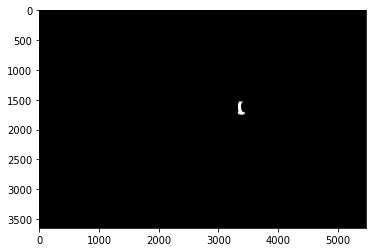

In [7]:
msk = cv2.imread(imgList[0])
plt.imshow(msk)

In [28]:
def generate_masks(data, imgPath, label):
    masks=[]
    images = []
    for imageId in data['ImageId']:
        enc_pxl=data.loc[data['ImageId']==imageId,'EncodedPixels'].tolist()
        enc_px_lst=list(map(int, enc_pxl[0].split(' ')))
        pixel,pixel_count = [],[]
        [pixel.append(enc_px_lst[i]) if i%2==0 else pixel_count.append(enc_px_lst[i]) for i in range(0, len(enc_px_lst))]
        rle_pixels = [list(range(pixel[i],pixel[i]+pixel_count[i])) for i in range(0, len(pixel))]
        rle_mask_pixels = sum(rle_pixels,[])
        h=int(data.loc[data['ImageId']==imageId,'Height'].tolist()[0])
        w=int(data.loc[data['ImageId']==imageId,'Width'].tolist()[0])
        if os.path.exists(imgPath + imageId + '.jpg'):
          img=cv2.imread(imgPath + imageId + '.jpg')
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          mask_img = np.zeros((h*w,1), dtype=np.uint8)
          mask_img[rle_mask_pixels] = label
          mask = np.reshape(mask_img, (w, h)).T
          masks.append(tf.convert_to_tensor(mask))
          images.append(tf.convert_to_tensor(img))           
    return images, masks

In [6]:
%ls

/content
drive/  sample_data/


In [29]:
#%cd /content/fashionPedia/
#import load_images

cl13SubData=pd.read_csv('/content/fashionPedia/data/train_cl13.csv')
cl18SubData=pd.read_csv('/content/fashionPedia/data/train_cl18.csv')
imgPath='/content/fashionPedia/data/train/'
cl13Imgs, cl13Masks=generate_masks(cl13SubData.sample(n=100), imgPath, 1)


In [30]:
cl18Imgs, cl18Masks=generate_masks(cl18SubData.sample(n=100), imgPath, 2)

In [31]:
images=cl13Imgs+cl18Imgs
masks = cl13Masks + cl18Masks
len(images), len(masks)

(199, 199)

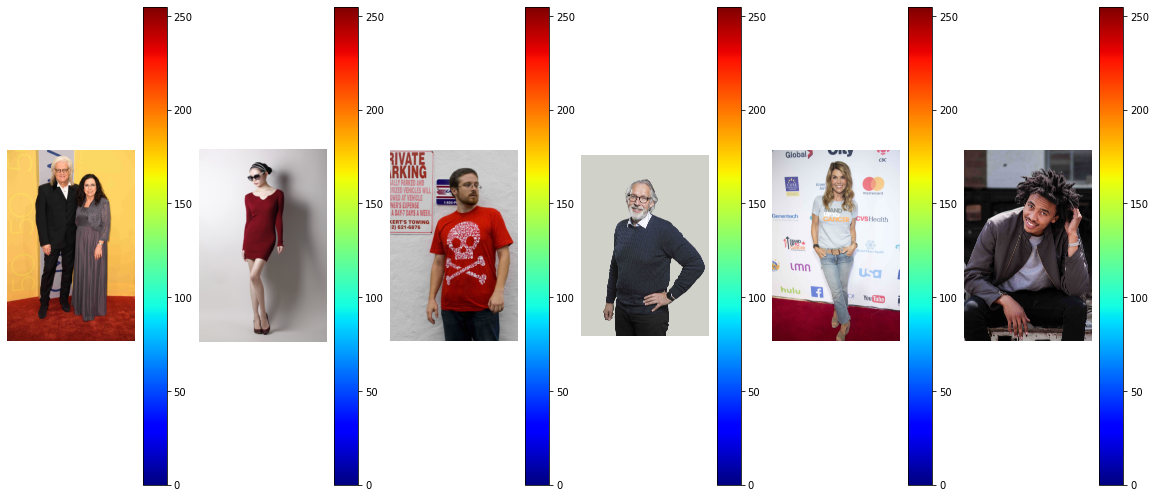

In [19]:
plt.figure(figsize=(20,10))
for i in range(1,7):
  plt.subplot(1,6,i)
  
  if i>3:
    img1 = images[i+99]
    plt.imshow(img1, cmap='jet')
    plt.colorbar()
    plt.axis('off')
  else:
    img = images[i]
    plt.imshow(img, cmap='jet')
    plt.colorbar()
    plt.axis('off')
plt.show() 

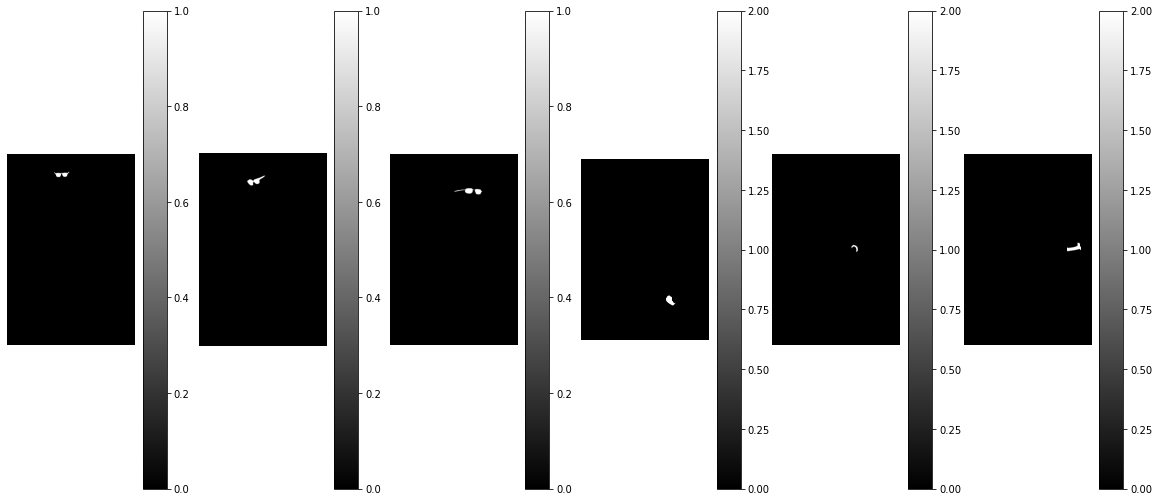

In [27]:
plt.figure(figsize=(20,10))
for i in range(1,7):
  plt.subplot(1,6,i)
  
  if i>3:
    img1 = masks[i+99]
    plt.imshow(img1, cmap='gray')
    plt.colorbar()
    plt.axis('off')
  else:
    img = masks[i]
    plt.imshow(img, cmap='gray')
    plt.colorbar()
    plt.axis('off')
plt.show() 

In [32]:
def resize_image(image):
     image = tf.cast(image, tf.float32)
     # scale values to [0,1]
     image = image/255.0
     # resize image
     image = tf.image.resize(image, (128,128))
     return image 
def resize_mask(mask):
     mask = tf.expand_dims(mask, axis=-1)
     mask = tf.image.resize(mask, (128,128))
     mask = tf.cast(mask, tf.uint8)
     return mask     

In [33]:
X = [resize_image(i) for i in images]
Y = [resize_mask(m) for m in masks] 

In [46]:
len(X)

199

In [34]:
valImg=int(len(X)*0.2)
train_X, val_X,train_Y, val_Y = X[valImg:],X[:valImg],Y[valImg:],Y[:valImg]

In [31]:
#from sklearn.model_selection import train_test_split

#train_X, val_X,train_Y, val_Y = train_test_split(X,Y,test_size=0.2,random_state=0)

In [35]:
len(train_X), len(val_X),len(train_Y), len(val_Y)

(160, 39, 160, 39)

In [36]:
train_X = tf.data.Dataset.from_tensor_slices(X)
val_X = tf.data.Dataset.from_tensor_slices(val_X)
train_y = tf.data.Dataset.from_tensor_slices(train_Y)
val_y = tf.data.Dataset.from_tensor_slices(val_Y)
train_X.element_spec, train_y.element_spec, val_X.element_spec, val_y.element_spec 

(TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(128, 128, 1), dtype=tf.uint8, name=None),
 TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(128, 128, 1), dtype=tf.uint8, name=None))

In [37]:
train = tf.data.Dataset.zip((train_X, train_y))
val = tf.data.Dataset.zip((val_X, val_y)) 

In [38]:
BATCH = 16
AT = tf.data.AUTOTUNE
BUFFER = 199
STEPS_PER_EPOCH = 160//BATCH
VALIDATION_STEPS = 39//BATCH
train = train.cache().shuffle(BUFFER).batch(BATCH).repeat()
train = train.prefetch(buffer_size=AT)
val = val.batch(BATCH)     

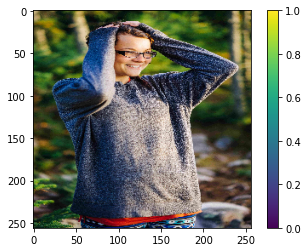

In [19]:
example = next(iter(train))
preds = unet(example[0])
plt.imshow(example[0][4])
plt.colorbar()
plt.show()

In [ ]:
hist = unet.fit(train,
                validation_data=val,
                steps_per_epoch=STEPS_PER_EPOCH,
                validation_steps=VALIDATION_STEPS,
                epochs=10)

Epoch 1/20
20/20 [==============================] - 1169s 58s/step - loss: 0.0831 - accuracy: 0.9979 - val_loss: 0.0310 - val_accuracy: 0.9975
Epoch 2/20
20/20 [==============================] - 1151s 58s/step - loss: 0.0244 - accuracy: 0.9982 - val_loss: 0.0303 - val_accuracy: 0.9975
Epoch 3/20
20/20 [==============================] - 1150s 58s/step - loss: 0.0205 - accuracy: 0.9982 - val_loss: 0.0309 - val_accuracy: 0.9975
Epoch 4/20
20/20 [==============================] - 1150s 58s/step - loss: 0.0191 - accuracy: 0.9982 - val_loss: 0.0366 - val_accuracy: 0.9975
Epoch 5/20
20/20 [==============================] - 1147s 57s/step - loss: 0.0176 - accuracy: 0.9982 - val_loss: 0.0249 - val_accuracy: 0.9975
Epoch 6/20
 5/20 [======>.......................] - ETA: 13:37 - loss: 0.0223 - accuracy: 0.9978

In [39]:
hist_1 = unet_1.fit(train,
                validation_data=val,
                steps_per_epoch=STEPS_PER_EPOCH,
                validation_steps=VALIDATION_STEPS,
                epochs=10)

Epoch 1/10
10/10 [==============================] - 325s 31s/step - loss: 0.7944 - accuracy: 0.8811 - val_loss: 0.6927 - val_accuracy: 0.9968
Epoch 2/10
10/10 [==============================] - 320s 32s/step - loss: 0.6925 - accuracy: 0.9982 - val_loss: 0.6922 - val_accuracy: 0.9975
Epoch 3/10
10/10 [==============================] - 314s 32s/step - loss: 0.6920 - accuracy: 0.9983 - val_loss: 0.6917 - val_accuracy: 0.9976
Epoch 4/10
10/10 [==============================] - 314s 32s/step - loss: 0.6915 - accuracy: 0.9983 - val_loss: 0.6912 - val_accuracy: 0.9976
Epoch 5/10
10/10 [==============================] - 314s 32s/step - loss: 0.6910 - accuracy: 0.9983 - val_loss: 0.6907 - val_accuracy: 0.9976
Epoch 6/10
10/10 [==============================] - 315s 32s/step - loss: 0.6905 - accuracy: 0.9983 - val_loss: 0.6902 - val_accuracy: 0.9976
Epoch 7/10
10/10 [==============================] - 316s 32s/step - loss: 0.6900 - accuracy: 0.9983 - val_loss: 0.6897 - val_accuracy: 0.9976
Epoch 

In [40]:
unet_1.save('/content/fashionPedia/my_model_1')

INFO:tensorflow:Assets written to: /content/fashionPedia/my_model_1/assets


In [41]:
img, mask = next(iter(val))
pred = unet_1.predict(img)

In [49]:
pred[0].shape

(128, 128, 1)

In [ ]:
plt.figure(figsize=(20,10))
for i in pred:
     plt.subplot(121)
     i = tf.argmax(i, axis=-1)
     i.shape
     plt.imshow(i,cmap='gray')
     plt.axis('off')
     plt.title('Prediction')
     break

plt.subplot(122)
plt.imshow(mask[0], cmap='gray')
plt.axis('off')
plt.title('Ground Truth')
plt.show() 

In [50]:
hist_2 = unet_2.fit(train,
                validation_data=val,
                steps_per_epoch=STEPS_PER_EPOCH,
                validation_steps=VALIDATION_STEPS,
                epochs=10)
unet_2.save('/content/fashionPedia/my_model_2')

Epoch 1/10
10/10 [==============================] - 199s 20s/step - loss: 0.5357 - accuracy: 0.8790 - val_loss: 0.1202 - val_accuracy: 0.9961
Epoch 2/10
10/10 [==============================] - 196s 20s/step - loss: 0.0827 - accuracy: 0.9978 - val_loss: 0.0760 - val_accuracy: 0.9976
Epoch 3/10
10/10 [==============================] - 193s 19s/step - loss: 0.0684 - accuracy: 0.9983 - val_loss: 0.0588 - val_accuracy: 0.9976
Epoch 4/10
10/10 [==============================] - 194s 19s/step - loss: 0.0428 - accuracy: 0.9983 - val_loss: 0.0635 - val_accuracy: 0.9976
Epoch 5/10
10/10 [==============================] - 194s 19s/step - loss: 0.0348 - accuracy: 0.9983 - val_loss: 0.0449 - val_accuracy: 0.9976
Epoch 6/10
10/10 [==============================] - 192s 19s/step - loss: 0.0288 - accuracy: 0.9983 - val_loss: 0.0459 - val_accuracy: 0.9976
Epoch 7/10
10/10 [==============================] - 193s 19s/step - loss: 0.0247 - accuracy: 0.9983 - val_loss: 0.0467 - val_accuracy: 0.9976
Epoch 

In [51]:
hist_3 = unet_3.fit(train,
                validation_data=val,
                steps_per_epoch=STEPS_PER_EPOCH,
                validation_steps=VALIDATION_STEPS,
                epochs=10)
unet_3.save('/content/fashionPedia/my_model_3')

Epoch 1/10
10/10 [==============================] - 197s 20s/step - loss: 0.1559 - accuracy: 0.9974 - val_loss: 0.0829 - val_accuracy: 0.9976
Epoch 2/10
10/10 [==============================] - 192s 19s/step - loss: 0.0484 - accuracy: 0.9983 - val_loss: 0.0377 - val_accuracy: 0.9976
Epoch 3/10
10/10 [==============================] - 194s 19s/step - loss: 0.0307 - accuracy: 0.9983 - val_loss: 0.0330 - val_accuracy: 0.9976
Epoch 4/10
10/10 [==============================] - 192s 19s/step - loss: 0.0246 - accuracy: 0.9983 - val_loss: 0.0251 - val_accuracy: 0.9976
Epoch 5/10
10/10 [==============================] - 192s 19s/step - loss: 0.0202 - accuracy: 0.9983 - val_loss: 0.0207 - val_accuracy: 0.9976
Epoch 6/10
10/10 [==============================] - 193s 19s/step - loss: 0.0184 - accuracy: 0.9983 - val_loss: 0.0194 - val_accuracy: 0.9976
Epoch 7/10
10/10 [==============================] - 192s 19s/step - loss: 0.0181 - accuracy: 0.9983 - val_loss: 0.0182 - val_accuracy: 0.9976
Epoch 

In [ ]:
cl2SubData.head()

,Index,ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds
0,296,003a6ca3eaa7886da61ed2de2c5e8d27,5158311 19 5161042 23 5163772 28 5163869 5 516...,2733,3630,2,"136,147,295,316,317"
1,32289,18b71fb0cac8e26770f48d5489de1162,4195044 108 4200653 115 4206263 121 4211872 12...,5616,3744,2,"115,136,145,147,295,316,317"
2,198537,98a09c470ab619c26217e7fc27653961,61614 3 63212 8 64810 13 66408 19 68006 24 696...,1600,1600,2,"115,136,145,146,295,316,318"
3,271007,d06373cced9b8dfcba7422913ec8cfb8,36827 2 37822 8 38818 12 39814 16 40810 21 418...,1000,800,2,"115,145,147,295,301,322"
4,224396,aca949bf9a2f6a741b065298f9ad1274,5516287 2 5519258 5 5522229 9 5525200 12 55281...,2974,4460,2,"115,136,145,146,295,316,317"


In [ ]:
img=cv2.imread(imgList[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


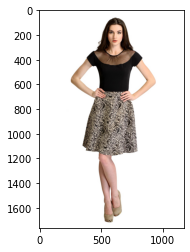

In [ ]:
plt.imshow(img)